Yüklenen kayıt: d:\ecg\data\raw\ptbxl\records500\00000\00001_hr

Kayıt Bilgileri:
Örnekleme hızı: 500 Hz
Sinyal uzunluğu: 5000 örnek
Lead sayısı: 12
Lead isimleri: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


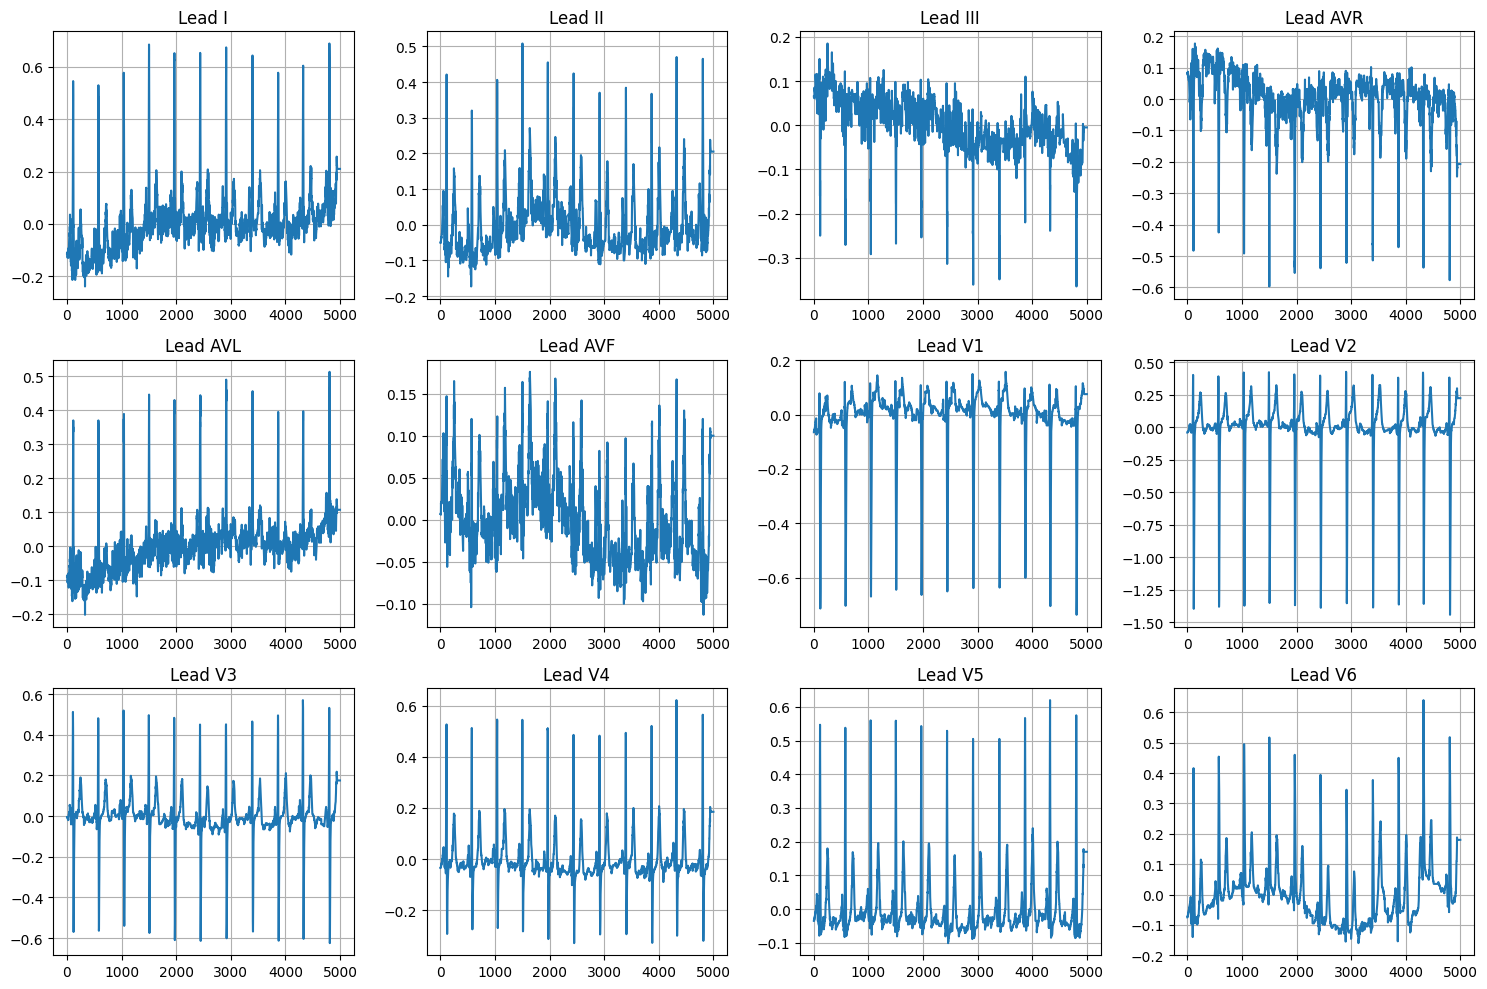

In [14]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def load_and_plot_ecg(data_path, record_id="00001"):
    """
    Tek bir EKG kaydını yükle ve görselleştir
    """
    # Dosya yolunu oluştur (500Hz versiyonu kullanalım)
    record_path = data_path / "records500/00000" / f"{record_id}_hr"
    
    print(f"Yüklenen kayıt: {record_path}")
    
    try:
        # WFDB formatındaki kaydı oku
        record = wfdb.rdrecord(str(record_path))
        
        # Bilgileri göster
        print("\nKayıt Bilgileri:")
        print(f"Örnekleme hızı: {record.fs} Hz")
        print(f"Sinyal uzunluğu: {record.sig_len} örnek")
        print(f"Lead sayısı: {len(record.sig_name)}")
        print(f"Lead isimleri: {record.sig_name}")
        
        # EKG sinyallerini görselleştir
        plt.figure(figsize=(15, 10))
        
        # 12 lead için ayrı subplot'lar
        for i, lead in enumerate(record.sig_name, 1):
            plt.subplot(3, 4, i)
            plt.plot(record.p_signal[:, i-1])
            plt.title(f'Lead {lead}')
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        return record
        
    except Exception as e:
        print(f"Hata oluştu: {str(e)}")
        # Dizindeki dosyaları kontrol et
        print("\nDizindeki dosyalar:")
        try:
            files = list((data_path / "records500/00000").glob("*"))
            for f in files[:5]:  # İlk 5 dosyayı göster
                print(f.name)
        except Exception as dir_e:
            print(f"Dizin listelenirken hata: {str(dir_e)}")

# Veri yolu
data_path = Path("d:/ecg/data/raw/ptbxl")

# İlk kaydı yükle ve görselleştir
record = load_and_plot_ecg(data_path)

In [15]:
def analyze_ecg_signal(record):
    """
    EKG sinyalinin temel özelliklerini analiz et
    """
    print("\nEKG Sinyal Analizi:")
    print("-" * 50)
    
    # Sinyal istatistikleri
    signal_data = record.p_signal
    
    for i, lead in enumerate(record.sig_name):
        lead_signal = signal_data[:, i]
        print(f"\nLead {lead} İstatistikleri:")
        print(f"Ortalama: {np.mean(lead_signal):.2f}")
        print(f"Standart Sapma: {np.std(lead_signal):.2f}")
        print(f"Min: {np.min(lead_signal):.2f}")
        print(f"Max: {np.max(lead_signal):.2f}")
    
    # Örnekleme hızı ve süre bilgileri
    duration = record.sig_len / record.fs
    print(f"\nKayıt Süresi: {duration:.2f} saniye")
    print(f"Toplam Örnek Sayısı: {record.sig_len}")
    print(f"Örnekleme Hızı: {record.fs} Hz")

# Analizi çalıştır
analyze_ecg_signal(record)

# Şimdi bir sonraki adım için planlama yapalım
print("\nSonraki Adımlar:")
print("-" * 50)
print("1. Sinyal ön işleme:")
print("   - Gürültü temizleme")
print("   - Baseline düzeltme")
print("   - R-tepelerini tespit etme")
print("\n2. Özellik çıkarma:")
print("   - RR intervalleri")
print("   - QRS kompleksi analizi")
print("   - Ritim analizi")


EKG Sinyal Analizi:
--------------------------------------------------

Lead I İstatistikleri:
Ortalama: 0.00
Standart Sapma: 0.11
Min: -0.24
Max: 0.69

Lead II İstatistikleri:
Ortalama: 0.00
Standart Sapma: 0.09
Min: -0.17
Max: 0.51

Lead III İstatistikleri:
Ortalama: -0.00
Standart Sapma: 0.06
Min: -0.36
Max: 0.18

Lead AVR İstatistikleri:
Ortalama: -0.00
Standart Sapma: 0.09
Min: -0.60
Max: 0.18

Lead AVL İstatistikleri:
Ortalama: 0.00
Standart Sapma: 0.08
Min: -0.20
Max: 0.51

Lead AVF İstatistikleri:
Ortalama: 0.00
Standart Sapma: 0.05
Min: -0.11
Max: 0.18

Lead V1 İstatistikleri:
Ortalama: -0.00
Standart Sapma: 0.11
Min: -0.74
Max: 0.16

Lead V2 İstatistikleri:
Ortalama: 0.01
Standart Sapma: 0.22
Min: -1.44
Max: 0.43

Lead V3 İstatistikleri:
Ortalama: -0.00
Standart Sapma: 0.12
Min: -0.62
Max: 0.57

Lead V4 İstatistikleri:
Ortalama: -0.00
Standart Sapma: 0.10
Min: -0.33
Max: 0.62

Lead V5 İstatistikleri:
Ortalama: 0.00
Standart Sapma: 0.09
Min: -0.10
Max: 0.62

Lead V6 İstatisti